In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
# from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn import metrics
# from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data mining/Курсач/Spotify_Youtube.csv")
data.shape[1]
data.isna().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [ ]:
data.fillna({"Danceability":data["Danceability"].mean(), "Energy":data["Energy"].mean(),
             "Key":data["Key"].mean(), "Loudness":data["Loudness"].mean(), "Speechiness":data["Speechiness"].mean(),
                    "Acousticness":data["Acousticness"].mean(), "Instrumentalness":data["Instrumentalness"].mean(),
              "Liveness":data["Liveness"].mean(), "Valence":data["Valence"].mean(),
                    "Tempo":data["Tempo"].mean(), "Duration_ms":data["Duration_ms"].mean(),
              "Comments":data["Comments"].mean(), "Stream":data["Stream"].mean(), "Views" : data["Views"].mean(),
                    "Likes" : data["Likes"].mean(), 'official_video' : False, 'Licensed': False}, inplace = True)

## В данном датасете представлены следующие колонки:

In [ ]:
cols = data.columns
for col in cols:
  print(col)
data

Unnamed: 0
Artist
Url_spotify
Track
Album
Album_type
Uri
Danceability
Energy
Key
Loudness
Speechiness
Acousticness
Instrumentalness
Liveness
Valence
Tempo
Duration_ms
Url_youtube
Title
Channel
Views
Likes
Comments
Description
Licensed
official_video
Stream


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


## Пропуски присутствуют в данных колонках:

In [ ]:
data.isna().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          0
Energy                0
Key                   0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_ms           0
Url_youtube         470
Title               470
Channel             470
Views                 0
Likes                 0
Comments              0
Description         876
Licensed              0
official_video        0
Stream                0
dtype: int64

In [ ]:
data.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


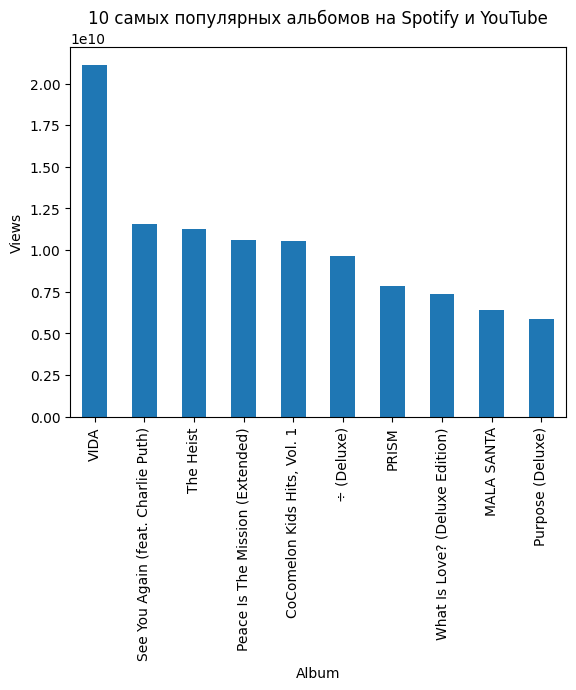

In [ ]:
albums = data.groupby('Album')['Views'].sum().sort_values(ascending=False)[:10]

fig, ax = plt.subplots()

ax.set_title('10 самых популярных альбомов на Spotify и YouTube')
albums.plot(kind='bar', ax=ax)

ax.set_xlabel('Album')
ax.set_ylabel('Views')

# ax.set_xticklabels(albums.index, rotation = 25)

# fig.tight_layout()
plt.show()

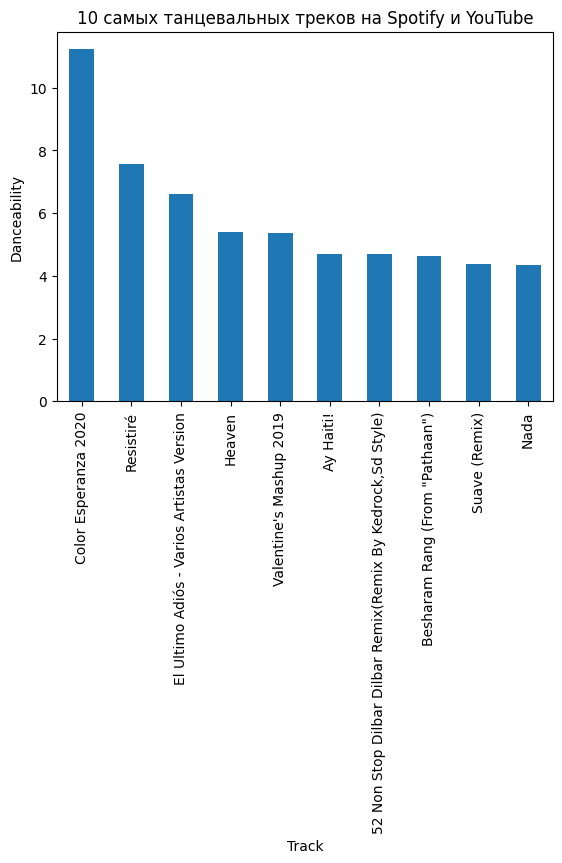

In [ ]:
tracks_dance = data.groupby('Track')['Danceability'].sum().sort_values(ascending=False)[:10]

fig2, ax2 = plt.subplots()

ax2.set_title('10 самых танцевальных треков на Spotify и YouTube')
tracks_dance.plot(kind='bar', ax=ax2)

ax2.set_xlabel('Track')
ax2.set_ylabel('Danceability')

# ax.set_xticklabels(albums.index, rotation = 25)

# fig.tight_layout()
plt.show()

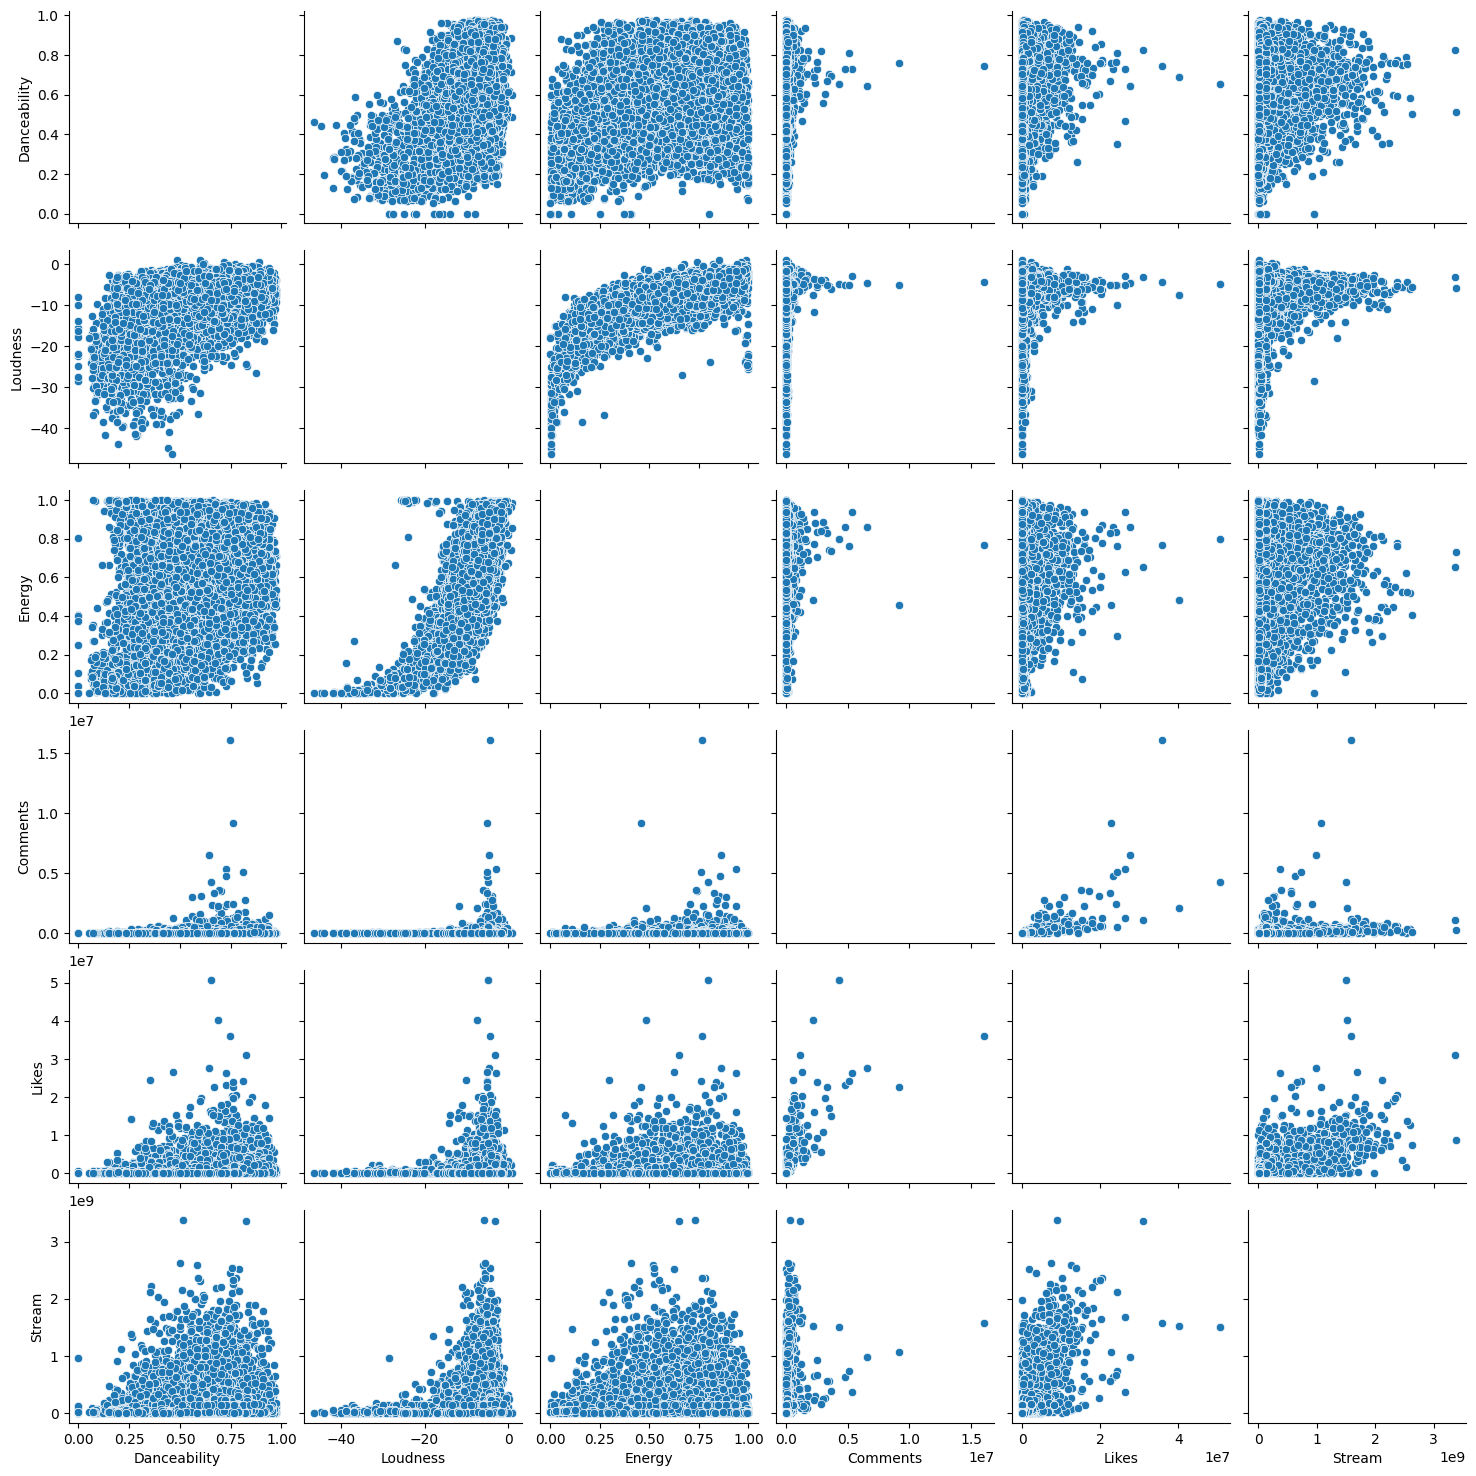

In [ ]:
pair = ["Danceability", "Loudness", "Energy", "Comments", "Likes", "Stream"]

sns_plot = sns.pairplot(data[pair], kind = "scatter", diag_kind = "scatter")
sns_plot.savefig("pairplot.png")

## Ищем выбросы для столбца Views

In [ ]:
# Создаем датафрейм, не содержащий в себе NaN-значений
views_wona = data.copy()
views_wona.fillna({"Views" : 0}, inplace = True)

In [ ]:
q3v, q1v = np.percentile(views_wona['Views'], [75, 25])
iqr_v = q3v - q1v
iqr_v

76033226.0

In [ ]:
iqr_v_outlier_up = q3v + 1.5*iqr_v
iqr_v_outlier_bottom = q1v - 1.5*iqr_v

print(f'{iqr_v_outlier_up}')
print(f'{iqr_v_outlier_bottom}')

192033628.25
-112099275.75


In [ ]:
outlier_v = data[(data['Views'] > iqr_v_outlier_up) | (data['Views'] < iqr_v_outlier_bottom)]
outlier_v[['Track', 'Views']]


,Track,Views
0,Feel Good Inc.,6.935552e+08
3,On Melancholy Hill,2.117550e+08
4,Clint Eastwood,6.184810e+08
5,DARE,2.590212e+08
10,Californication,1.018811e+09
...,...,...
20636,Enemy - From the series Arcane League of Legends,2.150257e+08
20674,No Se Va - En Vivo,2.387279e+08
20683,Left and Right (Feat. Jung Kook of BTS),2.933680e+08
20685,Left and Right (Feat. Jung Kook of BTS) - Acap...,2.933680e+08


In [ ]:
data[['Track', 'Views']]

,Track,Views
0,Feel Good Inc.,693555221.0
1,Rhinestone Eyes,72011645.0
2,New Gold (feat. Tame Impala and Bootie Brown),8435055.0
3,On Melancholy Hill,211754952.0
4,Clint Eastwood,618480958.0
...,...,...
20713,JUST DANCE HARDSTYLE,71678.0
20714,SET FIRE TO THE RAIN HARDSTYLE,164741.0
20715,OUTSIDE HARDSTYLE SPED UP,35646.0
20716,ONLY GIRL HARDSTYLE,6533.0


In [ ]:
# Производим удаление выбросов

indexNames_v = views_wona[(views_wona['Views'] >= iqr_v_outlier_up) | (views_wona['Views'] <= iqr_v_outlier_bottom)].index
views_wona.drop(indexNames_v, inplace=True)
views_wona
# final_df = views_wona.copy()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,310083733.0
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,63063467.0
6,6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.716,0.897,4.0,...,https://www.youtube.com/watch?v=BONNm0F7Tto,"Gorillaz - New Gold ft. Tame Impala, Bootie Br...",Dom Dolla,451996.0,11686.0,241.0,"Gorillaz 'New Gold' ft. Tame Impala, Bootie Br...",False,True,10666154.0
7,7,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,spotify:track:3lIxtCaROdRDuTnNBDm3n2,0.726,0.815,11.0,...,https://www.youtube.com/watch?v=f8NwLXYIHS4,Gorillaz - She's My Collar [HQ],SalvaMuñox,1010982.0,17675.0,260.0,𝐁̲𝐎̲𝐍̲𝐔̲𝐒̲:̲ Hu̳ma̳n̳z [̲̠̲𝐃̲̠̲𝐄̲̠̲𝐅̲̠̲𝐈̲̠̲𝐍̲̠...,False,False,159605929.0
8,8,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,spotify:track:2W3ZpQg9i6lE6kmHbcdu9N,0.741,0.913,2.0,...,https://www.youtube.com/watch?v=S03T47hapAc,Gorillaz - Cracker Island ft. Thundercat (Offi...,Gorillaz,24459820.0,739527.0,20296.0,Listen to Cracker Island: https://gorillaz.lnk...,True,True,42671901.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9227144.0
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,10898176.0
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6226110.0
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6873961.0


## Ищем выбросы для столбца Danceability      

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20718 non-null  float64
 8   Energy            20718 non-null  float64
 9   Key               20718 non-null  float64
 10  Loudness          20718 non-null  float64
 11  Speechiness       20718 non-null  float64
 12  Acousticness      20718 non-null  float64
 13  Instrumentalness  20718 non-null  float64
 14  Liveness          20718 non-null  float64
 15  Valence           20718 non-null  float64
 16  Tempo             20718 non-null  float6

In [ ]:
dance_wona = data.copy()
dance_wona.fillna({"Danceability" : 0}, inplace = True)

In [ ]:
q3d, q1d = np.percentile(dance_wona['Danceability'], [75, 25])
iqr_d = q3d - q1d
iqr_d

0.22175

In [ ]:
iqr_d_outlier_up = q3d + 1.5*iqr_d
iqr_d_outlier_bottom = q1d - 1.5*iqr_d

print(f'{iqr_d_outlier_up}')
print(f'{iqr_d_outlier_bottom}')

1.072625
0.18562499999999998


In [ ]:
indexNames_d = dance_wona[(dance_wona['Danceability'] >= iqr_d_outlier_up) | (dance_wona['Danceability'] <= iqr_d_outlier_bottom)].index
dance_wona.drop(indexNames_d, inplace=True)
dance_wona

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


## Ищем выбросы для столбца Energy

In [ ]:
energy_wona = data.copy()
energy_wona.fillna({"Energy" : 0}, inplace = True)

q3e, q1e = np.percentile(energy_wona['Energy'], [75, 25])
iqr_e = q3e - q1e
iqr_e

iqr_e_outlier_up = q3e + 1.5*iqr_e
iqr_e_outlier_bottom = q1e - 1.5*iqr_e

print(f'{iqr_e_outlier_up}')
print(f'{iqr_e_outlier_bottom}')

indexNames_e = energy_wona[(energy_wona['Energy'] >= iqr_d_outlier_up) | (energy_wona['Energy'] <= iqr_d_outlier_bottom)].index
energy_wona.drop(indexNames_e, inplace=True)
energy_wona

1.2345000000000002
0.07049999999999995


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


## Ищем выбросы для столбца Key

In [ ]:
key_wona = data.copy()
key_wona.fillna({"Key" : 0}, inplace = True)

q3k, q1k = np.percentile(key_wona['Key'], [75, 25])
iqr_k = q3k - q1k
iqr_k

iqr_k_outlier_up = q3k + 1.5*iqr_k
iqr_k_outlier_bottom = q1k - 1.5*iqr_k

print(f'{iqr_k_outlier_up}')
print(f'{iqr_k_outlier_bottom}')

indexNames_k = key_wona[(key_wona['Key'] >= iqr_k_outlier_up) | (key_wona['Key'] <= iqr_k_outlier_bottom)].index
key_wona.drop(indexNames_k, inplace=True)
key_wona

17.0
-7.0


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


## Ищем выбросы для столбца Loudness

In [ ]:
loud_wona = data.copy()
loud_wona.fillna({"Loudness" : 0}, inplace = True)

q3l, q1l = np.percentile(loud_wona['Loudness'], [75, 25])
iqr_l = q3l - q1l
iqr_l

iqr_l_outlier_up = q3l + 1.5*iqr_l
iqr_l_outlier_bottom = q1l - 1.5*iqr_l

print(f'{iqr_l_outlier_up}')
print(f'{iqr_l_outlier_bottom}')

indexNames_l = loud_wona[(loud_wona['Loudness'] >= iqr_l_outlier_up) | (loud_wona['Loudness'] <= iqr_l_outlier_bottom)].index
loud_wona.drop(indexNames_l, inplace=True)
loud_wona

0.9588749999999999
-14.748125000000002


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


## Ищем выбросы для столбца Speechiness

In [ ]:
sp_wona = data.copy()
sp_wona.fillna({"Speechiness" : 0}, inplace = True)

q3s, q1s = np.percentile(sp_wona['Speechiness'], [75, 25])
iqr_s = q3s - q1s
iqr_s

iqr_s_outlier_up = q3s + 1.5*iqr_s
iqr_s_outlier_bottom = q1s - 1.5*iqr_s

print(f'{iqr_s_outlier_up}')
print(f'{iqr_s_outlier_bottom}')


indexNames_s = sp_wona[(sp_wona['Speechiness'] >= iqr_s_outlier_up) | (sp_wona['Speechiness'] <= iqr_s_outlier_bottom)].index
sp_wona.drop(indexNames_s, inplace=True)
sp_wona

0.20395
-0.06525


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20712,20712,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,EVERYTIME WE TOUCH HARDSTYLE (SPED UP),EVERYTIME WE TOUCH HARDSTYLE (SPED UP),single,spotify:track:2dSNs47vHBSPnsUwpl39nk,0.554,0.874,1.0,...,https://www.youtube.com/watch?v=2C66T9FhnAk,EVERYTIME WE TOUCH HARDSTYLE (SPED UP),SICK LEGEND - Topic,16004.0,267.0,0.0,Provided to YouTube by Routenote\n\nEVERYTIME ...,True,True,9.921887e+06
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06


## Ищем выбросы для столбца Acousticness

In [ ]:
ac_wona = data.copy()
ac_wona.fillna({"Acousticness" : 0}, inplace = True)

q3a, q1a = np.percentile(ac_wona['Acousticness'], [75, 25])
iqr_a = q3a - q1a
iqr_a

iqr_a_outlier_up = q3a + 1.5*iqr_a
iqr_a_outlier_bottom = q1a - 1.5*iqr_a

print(f'{iqr_a_outlier_up}')
print(f'{iqr_a_outlier_bottom}')

indexNames_a = ac_wona[(ac_wona['Acousticness'] >= iqr_a_outlier_up) | (ac_wona['Acousticness'] <= iqr_a_outlier_bottom)].index
ac_wona.drop(indexNames_a, inplace=True)
ac_wona

1.1246999999999998
-0.6024999999999999


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


## Ищем выбросы для столбца Instrumentalness

In [ ]:
ins_wona = data.copy()
ins_wona.fillna({"Instrumentalness" : 0}, inplace = True)

q3i, q1i = np.percentile(ins_wona['Instrumentalness'], [75, 25])
iqr_i = q3i - q1i
iqr_i

iqr_i_outlier_up = q3i + 1.5*iqr_i
iqr_i_outlier_bottom = q1i - 1.5*iqr_i

print(f'{iqr_i_outlier_up}')
print(f'{iqr_i_outlier_bottom}')

indexNames_i = ins_wona[(ac_wona['Instrumentalness'] >= iqr_i_outlier_up) | (ins_wona['Instrumentalness'] <= iqr_i_outlier_bottom)].index
ins_wona.drop(indexNames_i, inplace=True)
ins_wona

0.0011575000000000001
-0.0006945


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
11,11,Red Hot Chili Peppers,https://open.spotify.com/artist/0L8ExT028jH3dd...,Under the Bridge,Blood Sugar Sex Magik (Deluxe Edition),album,spotify:track:3d9DChrdc6BOeFsbrZ3Is0,0.559,0.345,4.0,...,https://www.youtube.com/watch?v=GLvohMXgcBo,Red Hot Chili Peppers - Under The Bridge [Offi...,Red Hot Chili Peppers,246687714.0,1213572.0,32761.0,Watch the official music video for Under The B...,True,True,1.061751e+09
12,12,Red Hot Chili Peppers,https://open.spotify.com/artist/0L8ExT028jH3dd...,Can't Stop,By the Way (Deluxe Edition),album,spotify:track:3ZOEytgrvLwQaqXreDs2Jx,0.618,0.938,9.0,...,https://www.youtube.com/watch?v=8DyziWtkfBw,Red Hot Chili Peppers - Can't Stop [Official M...,Red Hot Chili Peppers,336635759.0,1740224.0,32573.0,Watch the official music video for Can't Stop ...,True,True,8.664650e+08
14,14,Red Hot Chili Peppers,https://open.spotify.com/artist/0L8ExT028jH3dd...,Otherside,Californication (Deluxe Edition),album,spotify:track:64BbK9SFKH2jk86U3dGj2P,0.458,0.795,0.0,...,https://www.youtube.com/watch?v=rn_YodiJO6k,Red Hot Chili Peppers - Otherside [Official Mu...,Red Hot Chili Peppers,673528656.0,3140356.0,60091.0,Watch the official music video for Otherside b...,True,True,7.327745e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20711,20711,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,MIDDLE OF THE NIGHT - HARDSTYLE REMIX,MIDDLE OF THE NIGHT - HARDSTYLE REMIX,single,spotify:track:4pqAkUZlA17gsTxFjP4BDL,0.292,0.692,2.0,...,https://www.youtube.com/watch?v=5f_RpP10nRk,MIDDLE OF THE NIGHT - HARDSTYLE REMIX,SICK LEGEND - Topic,254268.0,3472.0,0.0,Provided to YouTube by Routenote\n\nMIDDLE OF ...,True,True,1.712518e+07
20712,20712,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,EVERYTIME WE TOUCH HARDSTYLE (SPED UP),EVERYTIME WE TOUCH HARDSTYLE (SPED UP),single,spotify:track:2dSNs47vHBSPnsUwpl39nk,0.554,0.874,1.0,...,https://www.youtube.com/watch?v=2C66T9FhnAk,EVERYTIME WE TOUCH HARDSTYLE (SPED UP),SICK LEGEND - Topic,16004.0,267.0,0.0,Provided to YouTube by Routenote\n\nEVERYTIME ...,True,True,9.921887e+06
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07


## Ищем выбросы для столбца Liveness

In [ ]:
live_wona = data.copy()
live_wona.fillna({"Liveness" : 0}, inplace = True)

q3live, q1live = np.percentile(live_wona['Liveness'], [75, 25])
iqr_live = q3live - q1live
iqr_live

iqr_live_outlier_up = q3live + 1.5*iqr_live
iqr_live_outlier_bottom = q1live - 1.5*iqr_live

print(f'{iqr_live_outlier_up}')
print(f'{iqr_live_outlier_bottom}')

indexNames_live = live_wona[(live_wona['Liveness'] >= iqr_live_outlier_up) | (live_wona['Liveness'] <= iqr_live_outlier_bottom)].index
live_wona.drop(indexNames_live, inplace=True)
live_wona

0.45131249999999995
-0.12018749999999996


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,310083733.0
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,63063467.0
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,434663559.0
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,617259738.0
5,5,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,DARE,Demon Days,album,spotify:track:4Hff1IjRbLGeLgFgxvHflk,0.760,0.891,11.0,...,https://www.youtube.com/watch?v=uAOR6ib95kQ,Gorillaz - DARE (Official Video),Gorillaz,259021161.0,1844658.0,72008.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,323850327.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9227144.0
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,10898176.0
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6226110.0
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6873961.0


## Ищем выбросы для столбца Valence

In [ ]:
val_wona = data.copy()
val_wona.fillna({"Valence" : 0}, inplace = True)

q3val, q1val = np.percentile(val_wona['Valence'], [75, 25])
iqr_val = q3val - q1val
iqr_val

iqr_val_outlier_up = q3val + 1.5*iqr_val
iqr_val_outlier_bottom = q1val - 1.5*iqr_val

print(f'{iqr_val_outlier_up}')
print(f'{iqr_val_outlier_bottom}')

indexNames_val = val_wona[(val_wona['Valence'] >= iqr_val_outlier_up) | (val_wona['Valence'] <= iqr_val_outlier_bottom)].index
val_wona.drop(indexNames_val, inplace=True)
val_wona

1.3064999999999998
-0.24149999999999988


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


In [ ]:
data.shape[0]

20718

## Ищем выбросы для столбца Tempo

In [ ]:
temp_wona = data.copy()
temp_wona.fillna({"Tempo" : 0}, inplace = True)

q3t, q1t = np.percentile(temp_wona['Tempo'], [75, 25])
iqr_t = q3t - q1t
iqr_t

iqr_t_outlier_up = q3t + 1.5*iqr_t
iqr_t_outlier_bottom = q1t - 1.5*iqr_t

print(f'{iqr_t_outlier_up}')
print(f'{iqr_t_outlier_bottom}')

indexNames_t = temp_wona[(val_wona['Tempo'] >= iqr_t_outlier_up) | (temp_wona['Tempo'] <= iqr_t_outlier_bottom)].index
temp_wona.drop(indexNames_t, inplace=True)
temp_wona

204.33450000000002
32.60249999999998


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


## Ищем выбросы для столбца Duration_ms

In [ ]:
dur_wona = data.copy()
dur_wona.fillna({"Duration_ms" : 0}, inplace = True)

q3dur, q1dur = np.percentile(dur_wona['Duration_ms'], [75, 25])
iqr_dur = q3dur - q1dur
iqr_dur

iqr_dur_outlier_up = q3dur + 1.5*iqr_dur
iqr_dur_outlier_bottom = q1dur - 1.5*iqr_dur

print(f'{iqr_dur_outlier_up}')
print(f'{iqr_dur_outlier_bottom}')

indexNames_dur = dur_wona[(dur_wona['Duration_ms'] >= iqr_dur_outlier_up) | (dur_wona['Duration_ms'] <= iqr_dur_outlier_bottom)].index
dur_wona.drop(indexNames_dur, inplace=True)
dur_wona

361090.625
71361.625


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


## Ищем выбросы для столбца Likes

In [ ]:
like_wona = data.copy()
like_wona.fillna({"Likes" : 0}, inplace = True)

q3like, q1like = np.percentile(like_wona['Likes'], [75, 25])
iqr_like = q3like - q1like
iqr_like

iqr_like_outlier_up = q3like + 1.5*iqr_like
iqr_like_outlier_bottom = q1like - 1.5*iqr_like

print(f'{iqr_like_outlier_up}')
print(f'{iqr_like_outlier_bottom}')

indexNames_like = like_wona[(like_wona['Likes'] >= iqr_like_outlier_up) | (like_wona['Likes'] <= iqr_like_outlier_bottom)].index
like_wona.drop(indexNames_like, inplace=True)
like_wona

1439841.75
-827070.25


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,310083733.0
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,63063467.0
6,6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.716,0.897,4.0,...,https://www.youtube.com/watch?v=BONNm0F7Tto,"Gorillaz - New Gold ft. Tame Impala, Bootie Br...",Dom Dolla,451996.0,11686.0,241.0,"Gorillaz 'New Gold' ft. Tame Impala, Bootie Br...",False,True,10666154.0
7,7,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,spotify:track:3lIxtCaROdRDuTnNBDm3n2,0.726,0.815,11.0,...,https://www.youtube.com/watch?v=f8NwLXYIHS4,Gorillaz - She's My Collar [HQ],SalvaMuñox,1010982.0,17675.0,260.0,𝐁̲𝐎̲𝐍̲𝐔̲𝐒̲:̲ Hu̳ma̳n̳z [̲̠̲𝐃̲̠̲𝐄̲̠̲𝐅̲̠̲𝐈̲̠̲𝐍̲̠...,False,False,159605929.0
8,8,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,spotify:track:2W3ZpQg9i6lE6kmHbcdu9N,0.741,0.913,2.0,...,https://www.youtube.com/watch?v=S03T47hapAc,Gorillaz - Cracker Island ft. Thundercat (Offi...,Gorillaz,24459820.0,739527.0,20296.0,Listen to Cracker Island: https://gorillaz.lnk...,True,True,42671901.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9227144.0
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,10898176.0
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6226110.0
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6873961.0


## Ищем выбросы для столбца Comments

In [ ]:
comm_wona = data.copy()
comm_wona.fillna({"Comments" : 0}, inplace = True)

q3c, q1c = np.percentile(comm_wona['Comments'], [75, 25])
iqr_c= q3c - q1c
iqr_c

iqr_c_outlier_up = q3c + 1.5*iqr_c
iqr_c_outlier_bottom = q1c - 1.5*iqr_c

print(f'{iqr_c_outlier_up}')
print(f'{iqr_c_outlier_bottom}')

indexNames_c = comm_wona[(comm_wona['Comments'] >= iqr_c_outlier_up) | (comm_wona['Comments'] <= iqr_c_outlier_bottom)].index
comm_wona.drop(indexNames_c, inplace=True)
comm_wona

40362.0
-23350.0


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,310083733.0
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,63063467.0
6,6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.716,0.897,4.0,...,https://www.youtube.com/watch?v=BONNm0F7Tto,"Gorillaz - New Gold ft. Tame Impala, Bootie Br...",Dom Dolla,451996.0,11686.0,241.0,"Gorillaz 'New Gold' ft. Tame Impala, Bootie Br...",False,True,10666154.0
7,7,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,spotify:track:3lIxtCaROdRDuTnNBDm3n2,0.726,0.815,11.0,...,https://www.youtube.com/watch?v=f8NwLXYIHS4,Gorillaz - She's My Collar [HQ],SalvaMuñox,1010982.0,17675.0,260.0,𝐁̲𝐎̲𝐍̲𝐔̲𝐒̲:̲ Hu̳ma̳n̳z [̲̠̲𝐃̲̠̲𝐄̲̠̲𝐅̲̠̲𝐈̲̠̲𝐍̲̠...,False,False,159605929.0
8,8,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,spotify:track:2W3ZpQg9i6lE6kmHbcdu9N,0.741,0.913,2.0,...,https://www.youtube.com/watch?v=S03T47hapAc,Gorillaz - Cracker Island ft. Thundercat (Offi...,Gorillaz,24459820.0,739527.0,20296.0,Listen to Cracker Island: https://gorillaz.lnk...,True,True,42671901.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9227144.0
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,10898176.0
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6226110.0
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6873961.0


## Ищем выбросы для столбца Stream

In [ ]:
str_wona = data.copy()
str_wona.fillna({"Stream" : 0}, inplace = True)

q3st, q1st = np.percentile(str_wona['Stream'], [75, 25])
iqr_st= q3st - q1st
iqr_st

iqr_st_outlier_up = q3st + 1.5*iqr_st
iqr_st_outlier_bottom = q1st- 1.5*iqr_st

print(f'{iqr_st_outlier_up}')
print(f'{iqr_st_outlier_bottom}')

indexNames_st = str_wona[(str_wona['Stream'] >= iqr_st_outlier_up) | (str_wona['Stream'] <= iqr_st_outlier_bottom)].index
str_wona.drop(indexNames_st, inplace=True)
str_wona

312470478.45745206
-158271623.07447124


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,310083733.0
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,63063467.0
6,6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.716,0.897,4.0,...,https://www.youtube.com/watch?v=BONNm0F7Tto,"Gorillaz - New Gold ft. Tame Impala, Bootie Br...",Dom Dolla,451996.0,11686.0,241.0,"Gorillaz 'New Gold' ft. Tame Impala, Bootie Br...",False,True,10666154.0
7,7,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,spotify:track:3lIxtCaROdRDuTnNBDm3n2,0.726,0.815,11.0,...,https://www.youtube.com/watch?v=f8NwLXYIHS4,Gorillaz - She's My Collar [HQ],SalvaMuñox,1010982.0,17675.0,260.0,𝐁̲𝐎̲𝐍̲𝐔̲𝐒̲:̲ Hu̳ma̳n̳z [̲̠̲𝐃̲̠̲𝐄̲̠̲𝐅̲̠̲𝐈̲̠̲𝐍̲̠...,False,False,159605929.0
8,8,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,spotify:track:2W3ZpQg9i6lE6kmHbcdu9N,0.741,0.913,2.0,...,https://www.youtube.com/watch?v=S03T47hapAc,Gorillaz - Cracker Island ft. Thundercat (Offi...,Gorillaz,24459820.0,739527.0,20296.0,Listen to Cracker Island: https://gorillaz.lnk...,True,True,42671901.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9227144.0
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,10898176.0
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6226110.0
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6873961.0


## Построение матрицы корреляции

In [ ]:
cols = data.columns[1:len(data.columns)]

In [ ]:
cols[2]

'Track'

In [ ]:
cols

Index(['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

<ipython-input-102-c42290e0008e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")


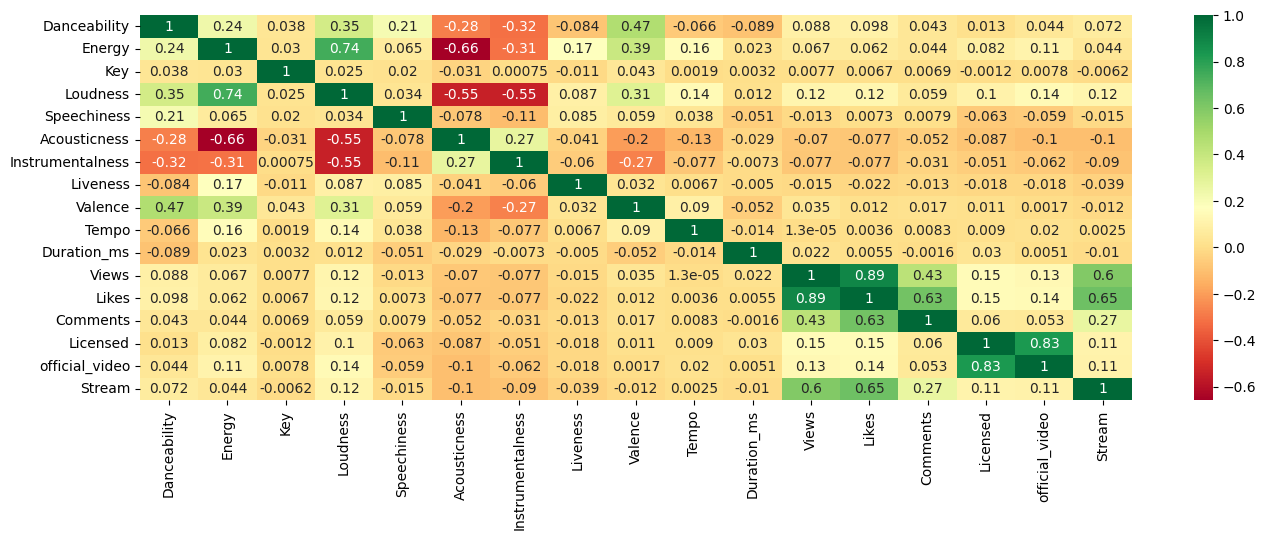

In [ ]:
X = data[cols]

plt.subplots(figsize=(16, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [ ]:
# Понимаем, что сильная зависимость - у столбцов Views и Licensed, поэтому удаляем его
data_wo_views = data.copy()
data_wo_views = data_wo_views.drop(["Views"], axis = 1)
data_wo_views = data_wo_views.drop(["Licensed"], axis = 1)
data_wo_views

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Tempo,Duration_ms,Url_youtube,Title,Channel,Likes,Comments,Description,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,90.002,94667.0,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,174.869,150857.0,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,168.388,136842.0,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,155.378,108387.0,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,6.873961e+06


<ipython-input-104-99b712b6e4c4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X1.corr(), annot=True, cmap="RdYlGn")


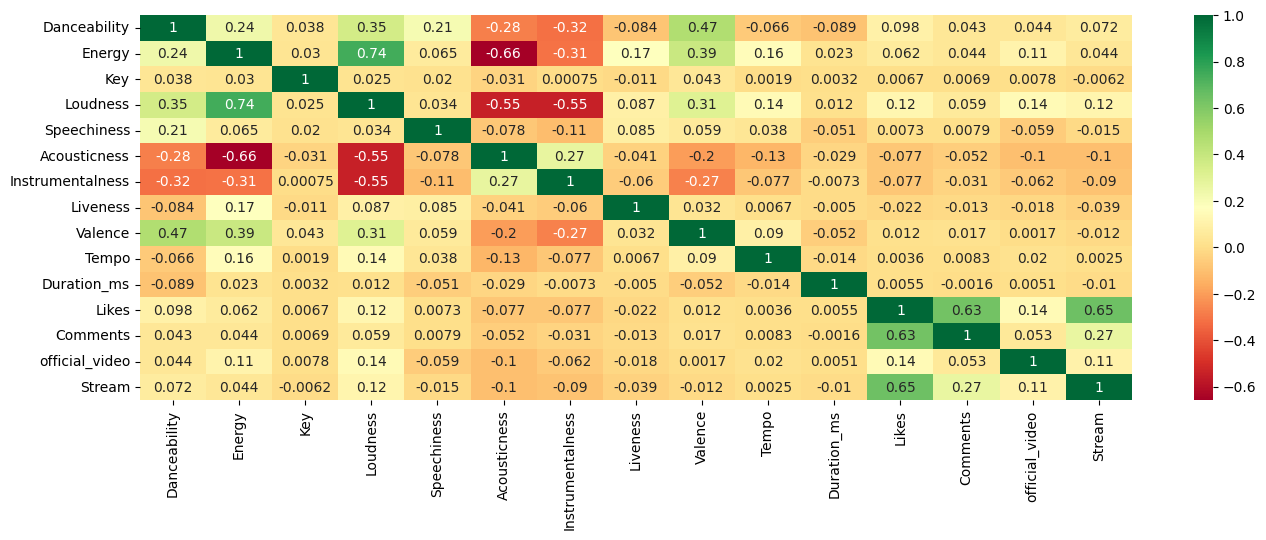

In [ ]:
X1 = data_wo_views[data_wo_views.columns[1:len(data_wo_views.columns)]]

plt.subplots(figsize=(16, 5))
sns.heatmap(X1.corr(), annot=True, cmap="RdYlGn")
plt.show()

## Разбиение датасета на обучающую и тестовую выборку (с помощью stratified k-fold). Stratified k fold - это метод разбиения данных на обучающие и тестовые подмножества для оценки качества модели. Он делит данные на k равных частей (folds) и сохраняет пропорцию классов в каждой части. Затем он использует одну часть как тестовый набор, а остальные - как обучающий набор. Он повторяет этот процесс k раз, используя разные части для тестирования. Это помогает избежать смещения в оценке модели из-за несбалансированности классов












In [ ]:
# Задача - по степени энергичности предугадать, будет ли у трека много лайков
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

In [ ]:
numeric_cols = ["Loudness", "Energy", "Comments", "Likes", "Stream"]

"Loudness", "Energy", "Comments", "Likes", "Stream"

('Loudness', 'Energy', 'Comments', 'Likes', 'Stream')

In [ ]:
data_cat = pd.get_dummies(data["official_video"], prefix = "official_video")
data_cat = pd.concat([data,data_cat], axis = 1)
X = data_cat[numeric_cols]
y = data_cat["official_video_True"]

skf = StratifiedKFold(n_splits=2)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]



In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

## Оценка эффективности алгоритма LogisticRegression

In [ ]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression(max_iter = 5)

# logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba, pos_label = 1)

# auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
# plt.plot (fpr,tpr,label=" AUC= "+str(auc))
# plt.legend(loc=4)
# plt.show()

# cnf_matrix = metrics.confusion_matrix (y_test, y_pred)
# print(" Accuracy:",metrics.accuracy_score (y_test, y_pred))

print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % metrics.accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % metrics.log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % metrics.auc(fpr, tpr))



Train/Test split results:
LogisticRegression accuracy is 0.759
LogisticRegression log_loss is 0.617
LogisticRegression auc is 0.567


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def create_plots(Roc_auc_dict:dict, Acc_dict:dict, Log_loss_dict:dict, F1_dict:dict, Prec_dict:dict, Recall_dict:dict, width = 20, height = 10, title = ""):
  names_roc_auc = list(Roc_auc_dict.keys())
  values_roc_auc = list(Roc_auc_dict.values())

  names_acc = list(Acc_dict.keys())
  values_acc = list(Acc_dict.values())

  names_log = list(Log_loss_dict.keys())
  values_log = list(Log_loss_dict.values())

  names_f1 = list(F1_dict.keys())
  values_f1 = list(F1_dict.values())

  names_prec = list(Prec_dict.keys())
  values_prec = list(Prec_dict.values())

  names_recall = list(Recall_dict.keys())
  values_recall = list(Recall_dict.values())


  # создаем фигуру и оси
  fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(width, height))
  ax = axs[0, 0]
  ax1 = axs[0, 1]
  ax2 = axs[1, 0]
  ax3 = axs[1, 1]
  ax4 = axs[2, 0]
  ax5 = axs[2, 1]

  # добавляем подписи к осям и заголовок
  ax.set_xlabel("Итерации")
  ax.set_ylabel("Проценты")
  ax.set_title("ROC AUC")

  ax1.set_xlabel("Итерации")
  ax1.set_ylabel("Проценты")
  ax1.set_title("Accuracy")

  ax2.set_xlabel("Итерации")
  ax2.set_ylabel("Проценты")
  ax2.set_title("Log loss")

  ax3.set_xlabel("Итерации")
  ax3.set_ylabel("Проценты")
  ax3.set_title("F1 Score")

  ax4.set_xlabel("Итерации")
  ax4.set_ylabel("Проценты")
  ax4.set_title("Precision")

  ax5.set_xlabel("Итерации")
  ax5.set_ylabel("Проценты")
  ax5.set_title("Recall")
  # показываем график
  fig.suptitle(title)
  ax.plot(names_roc_auc, values_roc_auc)
  ax1.plot(names_acc, values_acc)
  ax2.plot(names_log, values_log)
  ax3.plot(names_f1, values_f1)
  ax4.plot(names_prec, values_prec)
  ax5.plot(names_recall, values_recall)

  plt.show()

## Проверяем для себя, на какой итерации метрики алгоритма логистической регрессии показывают наилучшие результаты

In [ ]:
@ignore_warnings(category=ConvergenceWarning)
def gslr():
  logreg = LogisticRegression(max_iter = 20)

  param_grid_lr = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2',  'elasticnet'], "solver": ['newton-cg',' lbfgs', 'liblinear', 'sag', 'saga']}

  grid_search_lr = GridSearchCV(logreg, param_grid_lr)

  grid_search_lr.fit(X, y)

  print(f"Best params for logistic regression are: {grid_search_lr.best_params_}")

gslr()

Best params for logistic regression are: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


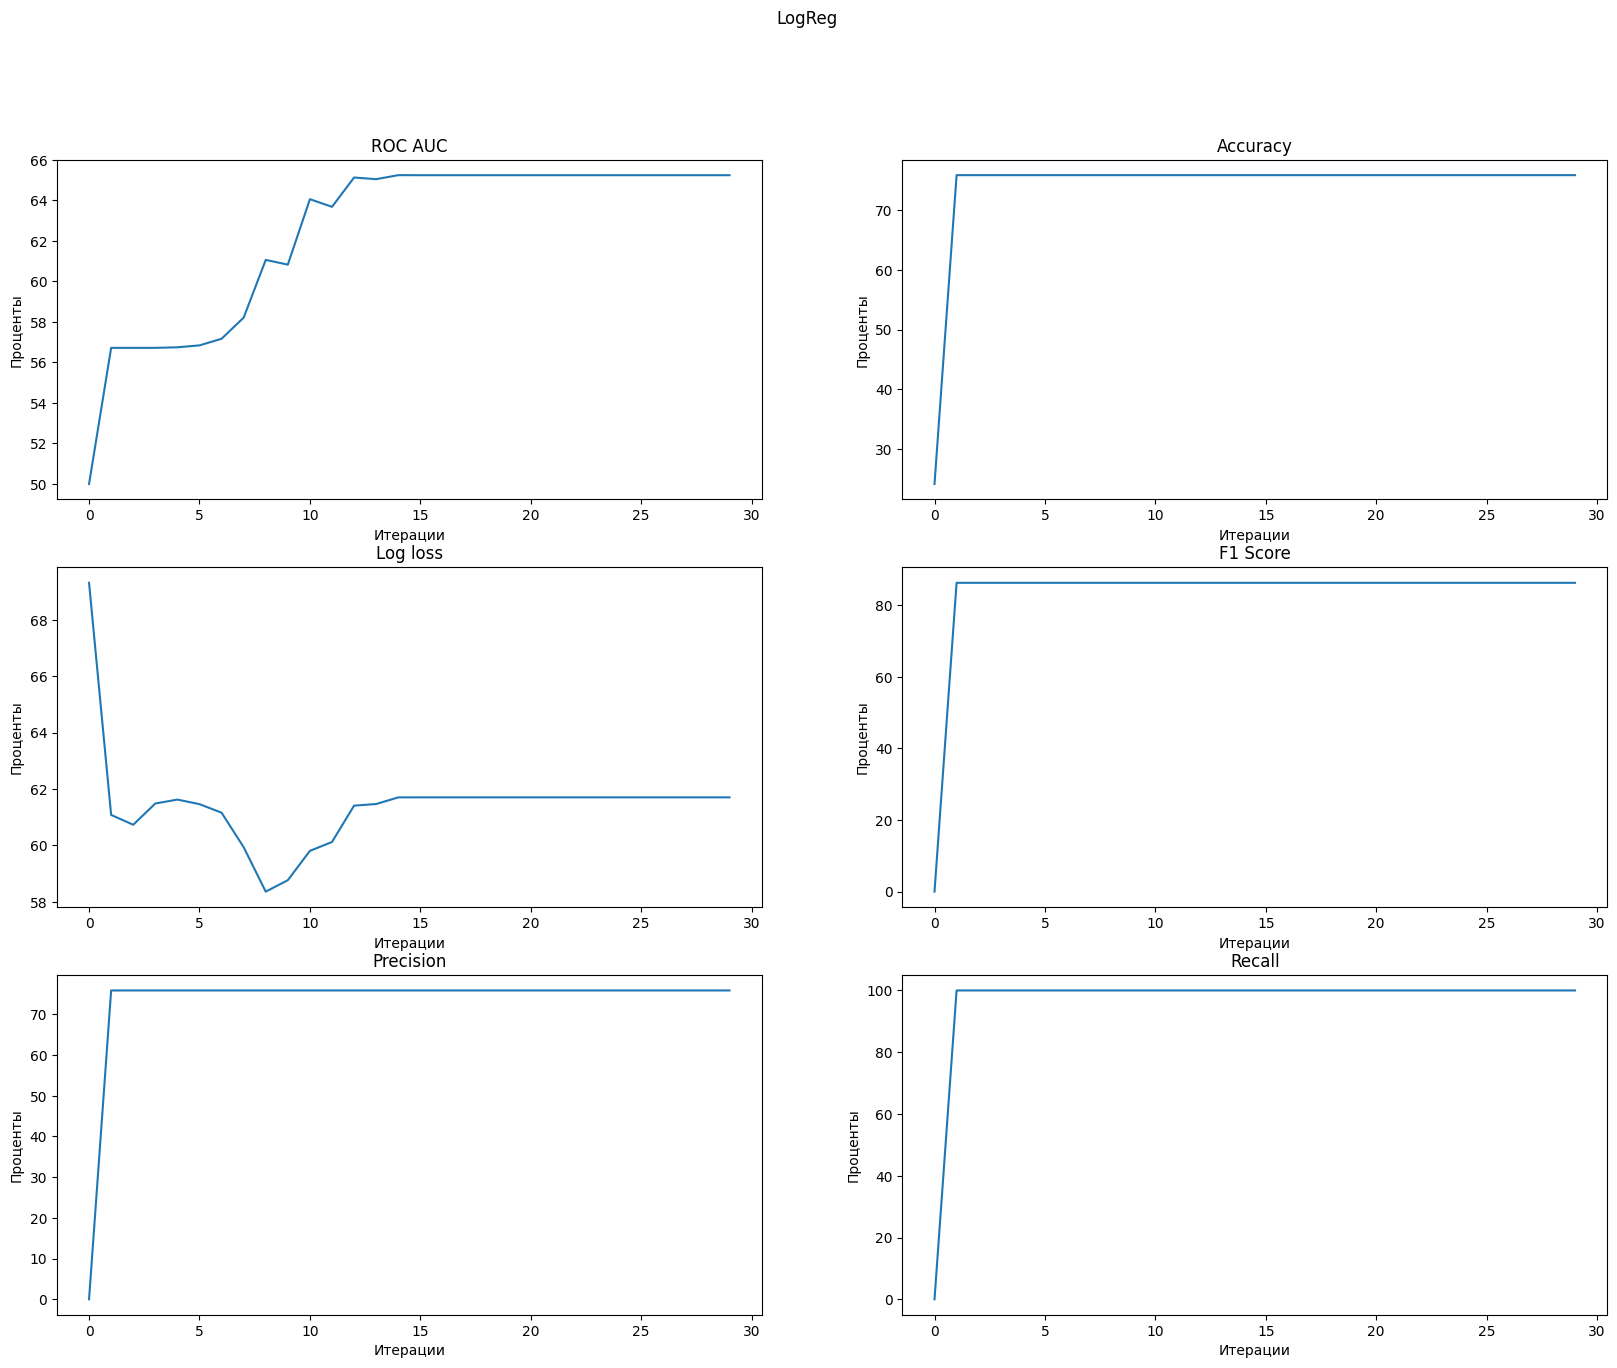

--- 5.89038348197937 seconds ---


In [ ]:
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

roc_auc_dict = {}
acc_dict = {}
log_loss_dict = {}
f1_dict = {}
prec_dict = {}
recall_dict = {}

@ignore_warnings(category=ConvergenceWarning)

def log_reg_metrics():
  mi = 0
  for i in range(30):
    lr = LogisticRegression(penalty = 'l2', C = 0.1, fit_intercept=True, solver='liblinear', max_iter = mi)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    y_pred_proba = lr.predict_proba(X_test)[:, 1]
    [fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba, pos_label = 1)

    # Добавляем в словарь пары с номером итерации и процентом распознавания
    roc_auc_dict[mi] = metrics.auc(fpr, tpr)*100
    acc_dict[mi] = metrics.accuracy_score(y_test, y_pred)*100
    log_loss_dict[mi] = metrics.log_loss(y_test, y_pred_proba)*100
    f1_dict[mi] = metrics.f1_score(y_test, y_pred)*100
    prec_dict[mi] = metrics.precision_score(y_test, y_pred)*100
    recall_dict[mi] = metrics.recall_score(y_test, y_pred)*100

    mi += 1
  create_plots(roc_auc_dict, acc_dict, log_loss_dict, f1_dict, prec_dict, recall_dict, 20, 15, "LogReg")

start_time = time.time()
log_reg_metrics()
print("--- %s seconds ---" % (time.time() - start_time))

## Оценка эффективности алгоритма SVC

In [ ]:

# Declaring the SVC with no tunning
classifier = SVC(max_iter = 1000)

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# Predicting the result and giving the accuracy
score = classifier.score(X_test, y_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(score)
print(accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.6744859542426875
0.6744859542426875


## Проверяем метрики алгоритма метода опорных векторов

In [ ]:
@ignore_warnings(category=ConvergenceWarning)
def gssvc():
  svc_1 = SVC(max_iter = 20, probability=True)

  param_grid_svc = {"coef0": [i for i in range(11)], "kernel": ["linear", "poly", "rbf", "sigmoid"]}
  # param_grid_lr = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

  grid_search_svc = GridSearchCV(svc_1, param_grid_svc)

  grid_search_svc.fit(X, y)

  print(f"Best params for svc are: {grid_search_svc.best_params_}")

gssvc()

Best params for svc are: {'coef0': 2, 'kernel': 'poly'}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=0).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing

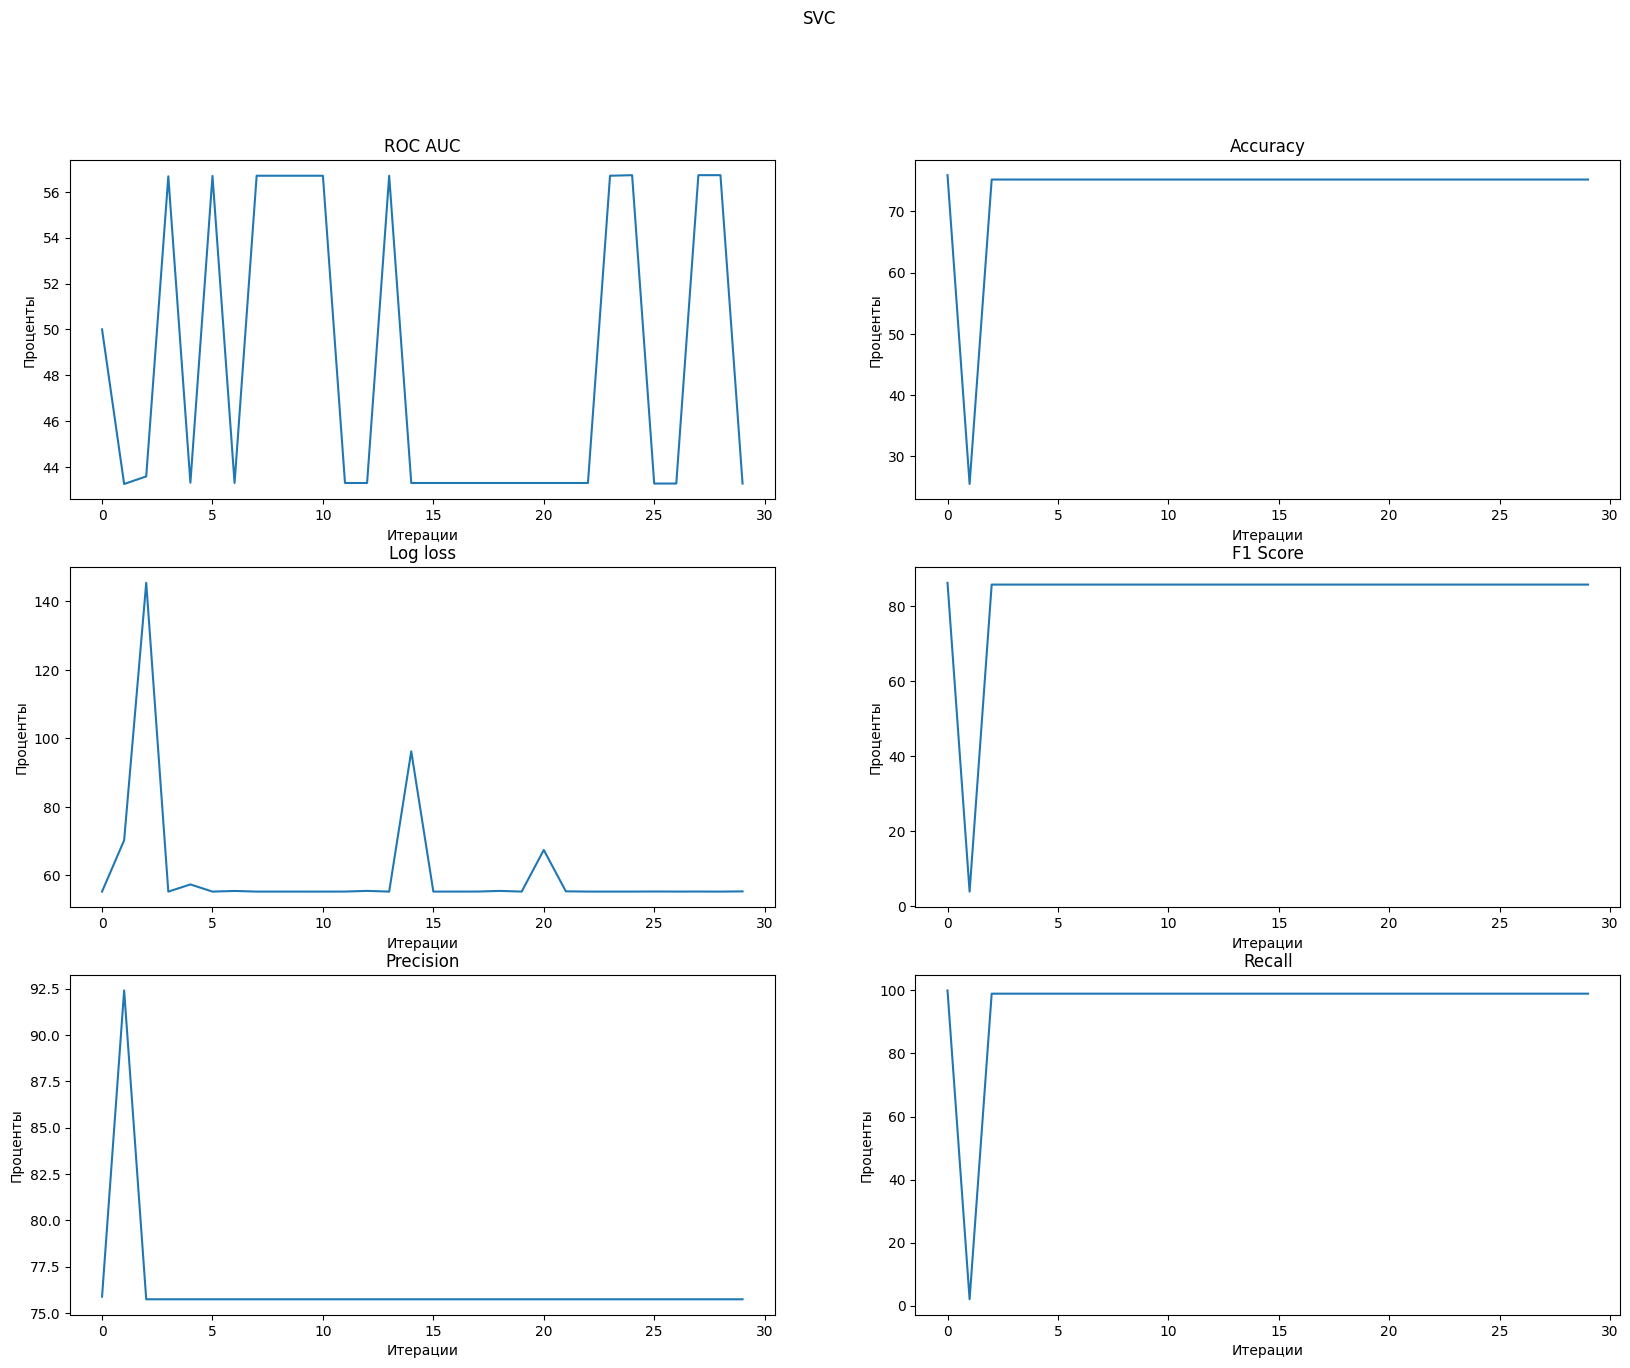

--- 8.253638505935669 seconds ---


In [ ]:
roc_auc_dict_svc = {}
acc_dict_svc = {}
log_loss_dict_svc = {}
f1_dict_svc = {}
prec_dict_svc = {}
recall_dict_svc = {}

def svc_metrics():
  mi = 0
  for i in range(30):
    svc = SVC(max_iter = mi, probability=True, kernel = "poly", coef0= 2)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    y_pred_proba = svc.predict_proba(X_test)[:, 1]
    [fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba, pos_label = 1)

    # Добавляем в словарь пары с номером итерации и процентом распознавания
    roc_auc_dict_svc[mi] = metrics.auc(fpr, tpr)*100
    acc_dict_svc[mi] = metrics.accuracy_score(y_test, y_pred)*100
    log_loss_dict_svc[mi] = metrics.log_loss(y_test, y_pred_proba)*100
    f1_dict_svc[mi] = metrics.f1_score(y_test, y_pred)*100
    prec_dict_svc[mi] = metrics.precision_score(y_test, y_pred)*100
    recall_dict_svc[mi] = metrics.recall_score(y_test, y_pred)*100

    mi += 1

  create_plots(roc_auc_dict_svc, acc_dict_svc, log_loss_dict_svc, f1_dict_svc, prec_dict_svc, recall_dict_svc, 20, 15, "SVC")

start_time = time.time()
svc_metrics()
print("--- %s seconds ---" % (time.time() - start_time))

## Проверяем метрики алгоритма градиентного бустинга

In [ ]:
@ignore_warnings(category=ConvergenceWarning)
def gsgb():
  gb_1 = GradientBoostingClassifier()

  param_grid_gb = {"loss": ["exponential", "log_loss", 'squared_error', 'absolute_error', "huber", "quantile"],
                    "learning_rate": [i for i in range(11)], "criterion": ["friedman_mse", "squared_error"]}
  # param_grid_lr = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

  grid_search_gb = GridSearchCV(gb_1, param_grid_gb)

  grid_search_gb.fit(X, y)

  print(f"Best params for gb are: {grid_search_gb.best_params_}")

gsgb()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
440 fits failed out of a total of 660.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best params for gb are: {'criterion': 'squared_error', 'learning_rate': 1, 'loss': 'exponential'}


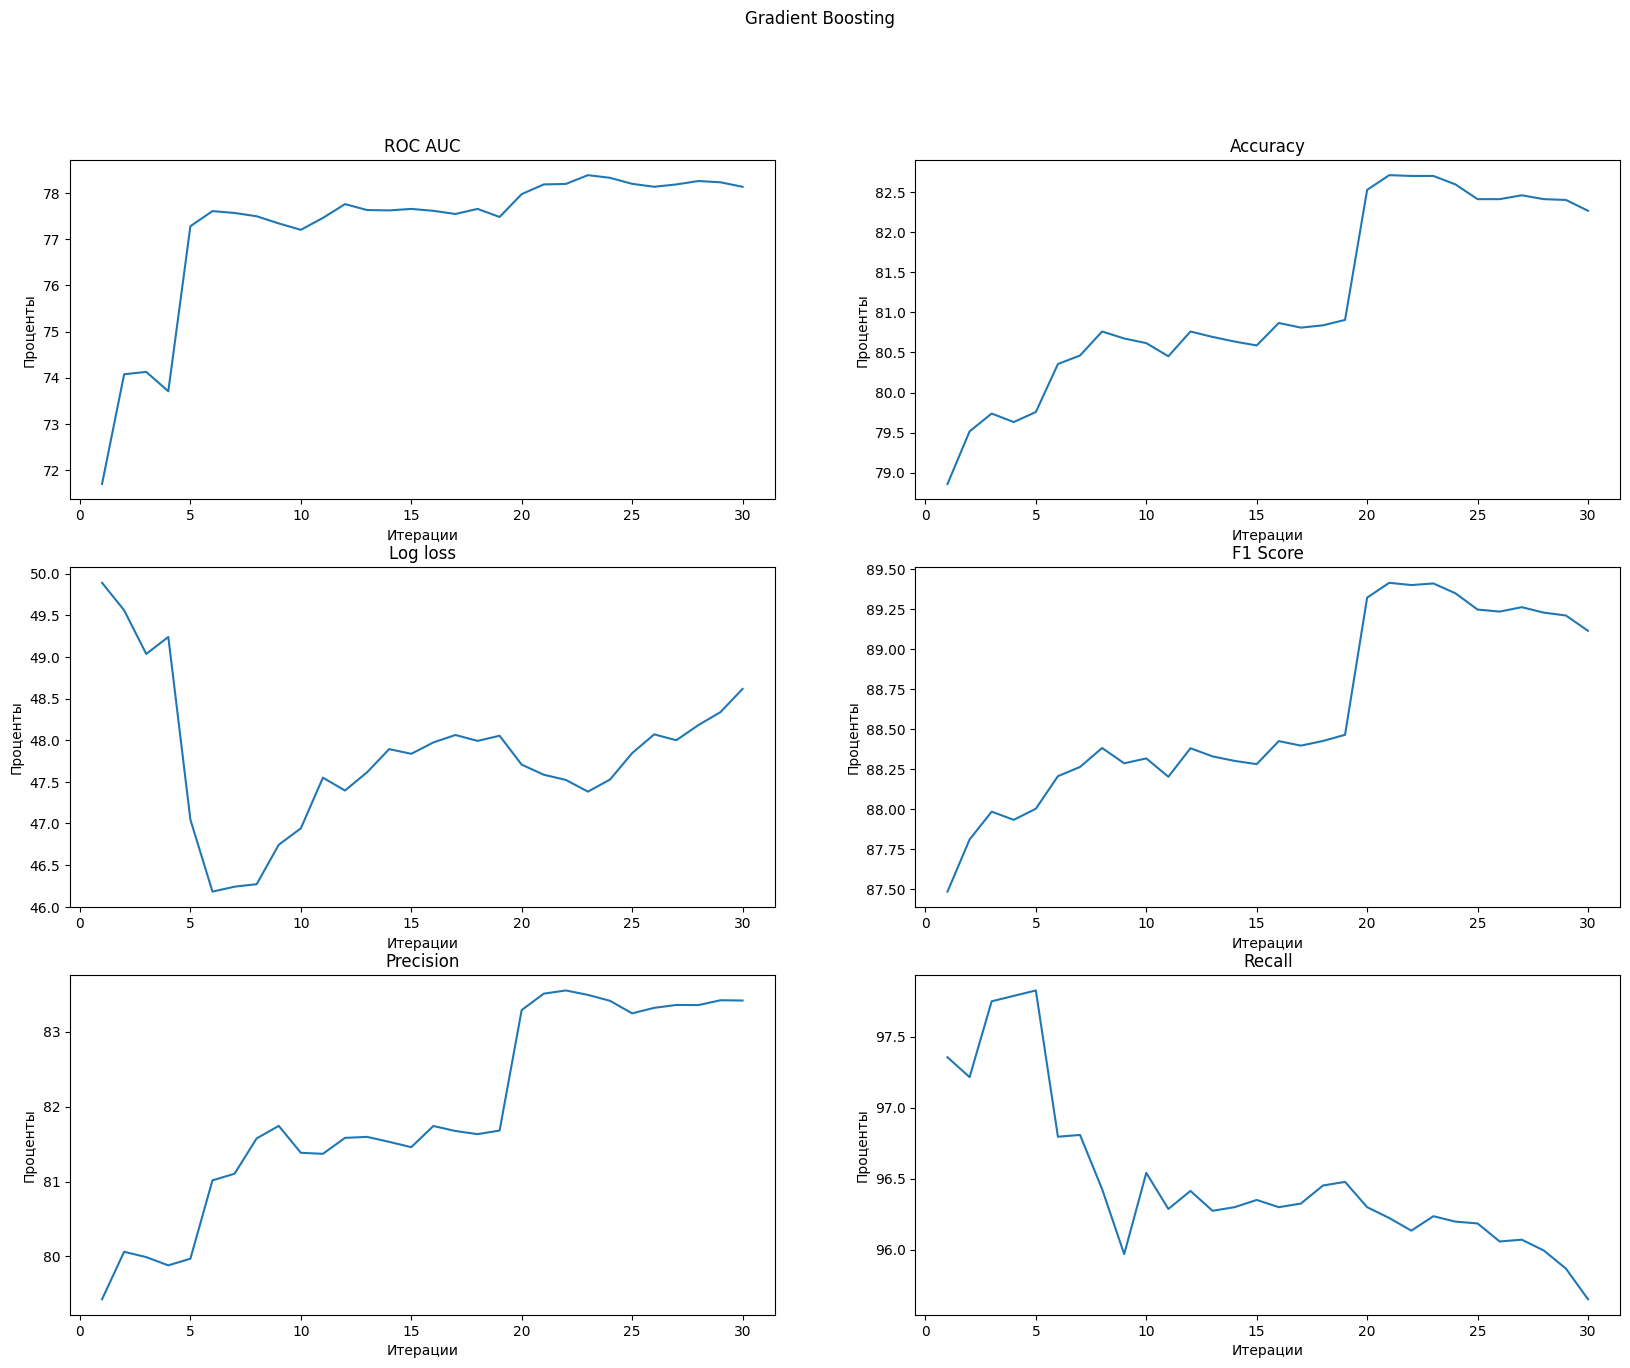

--- 15.646602153778076 seconds ---


In [ ]:
roc_auc_dict_gb = {}
acc_dict_gb = {}
log_loss_dict_gb = {}
f1_dict_gb = {}
prec_dict_gb = {}
recall_dict_gb = {}

def gb_metrics():
  mi = 1
  for i in range(30):
    gb = GradientBoostingClassifier(n_estimators = mi, loss = "exponential", learning_rate = 1, criterion = "squared_error")
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    y_pred_proba = gb.predict_proba(X_test)[:, 1]
    [fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba, pos_label = 1)


    # Добавляем в словарь пары с номером итерации и процентом распознавания
    roc_auc_dict_gb[mi] = metrics.auc(fpr, tpr)*100
    acc_dict_gb[mi] = metrics.accuracy_score(y_test, y_pred)*100
    log_loss_dict_gb[mi] = metrics.log_loss(y_test, y_pred_proba)*100
    f1_dict_gb[mi] = metrics.f1_score(y_test, y_pred)*100
    prec_dict_gb[mi] = metrics.precision_score(y_test, y_pred)*100
    recall_dict_gb[mi] = metrics.recall_score(y_test, y_pred)*100

    mi += 1

  create_plots(roc_auc_dict_gb, acc_dict_gb, log_loss_dict_gb, f1_dict_gb, prec_dict_gb, recall_dict_gb, 20, 15, "Gradient Boosting")

start_time = time.time()
gb_metrics()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
def input_arr(iters = 0):
  return np.array([[roc_auc_dict[iters], roc_auc_dict_svc[iters], roc_auc_dict_gb[iters]],
        [acc_dict[iters], acc_dict_svc[iters], acc_dict_gb[iters]],
        [log_loss_dict[iters], log_loss_dict_svc[iters], log_loss_dict_gb[iters]],
        [f1_dict[iters], f1_dict_svc[iters], f1_dict_gb[iters]],
        [prec_dict[iters], prec_dict_svc[iters], prec_dict_gb[iters]],
        [recall_dict[iters], recall_dict_svc[iters], recall_dict_gb[iters]]])

## Строим график, показывающий шесть значений метрик для каждого из трех алгоритмов

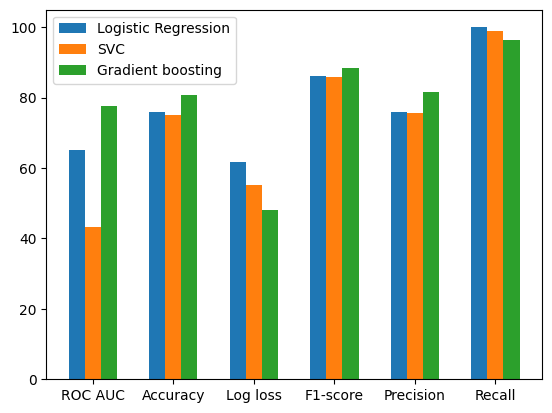

In [ ]:
algorithms = ['Logistic Regression', 'SVC', 'Gradient boosting']
metrics_plot = ["ROC AUC", "Accuracy", "Log loss", "F1-score", "Precision", "Recall"]
x = np.arange(6)
width = 0.2
data = input_arr(16)
data
fig, ax = plt.subplots()
for i in range(3):
    ax.bar(x - width + i*width, data[:, i], width, label=algorithms[i])


ax.set_xticks(x)
ax.set_xticklabels(metrics_plot)
ax.legend()

# Отображение графика
plt.show()

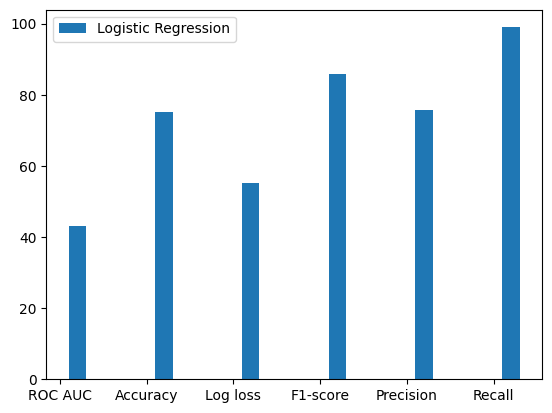

In [ ]:
algorithms = ['Logistic Regression']
metrics_plot = ["ROC AUC", "Accuracy", "Log loss", "F1-score", "Precision", "Recall"]
x = np.arange(6)
width = 0.2
data = input_arr(16)
data
fig, ax = plt.subplots()

ax.bar(x - width + i*width, data[:, 1], width, label=algorithms[0])


ax.set_xticks(x)
ax.set_xticklabels(metrics_plot)
ax.legend()

# Отображение графика
plt.show()

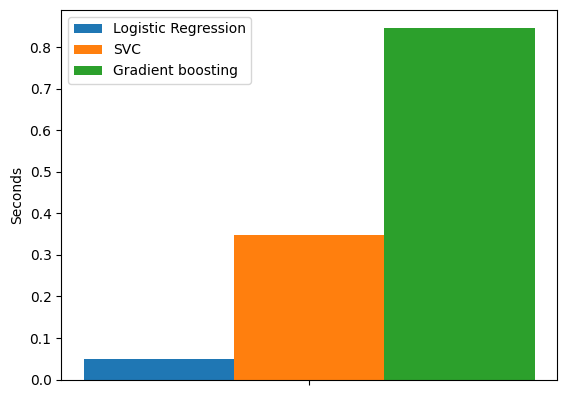

In [ ]:
algorithms = ['Logistic Regression', 'SVC', 'Gradient boosting']
metrics_plot = ["Exec time"]
x = np.arange(1)
width = 0.2
data = np.array([[lr_exe_time, svc_exe_time, gb_exe_time]])
data
fig, ax = plt.subplots()
for i in range(3):
    ax.bar(x - width + i*width, data[:, i], width, label=algorithms[i])


ax.set_xticks(x)
ax.set_xticklabels("")
ax.set_ylabel("Seconds")
ax.legend()

# Отображение графика
plt.show()

In [ ]:
data

array([[ 65.889208  ,  43.17184825,  76.03011044],
       [ 75.88570325,  75.17134859,  80.77999807],
       [ 61.06021195,  55.32528159,  50.13377303],
       [ 86.28979144,  85.81669792,  88.11981622],
       [ 75.88570325,  75.74223693,  82.98494044],
       [100.        ,  98.98231777,  93.93206971]])

In [ ]:
start_time = time.time()
lr = LogisticRegression(penalty = 'l2', C = 0.1, fit_intercept=True, solver='liblinear', max_iter = 29)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]
lr_exe_time = time.time() - start_time
print("Logistic Regression execution time\n--- %s seconds ---" % lr_exe_time)

start_time = time.time()
svc = SVC(max_iter = 29, probability=True, kernel = "poly", coef0= 2)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_pred_proba = svc.predict_proba(X_test)[:, 1]
svc_exe_time = time.time() - start_time
print("SVC execution time\n--- %s seconds ---" % (svc_exe_time))

start_time = time.time()
gb = GradientBoostingClassifier(n_estimators = 29, loss = "exponential", learning_rate = 1, criterion = "squared_error")
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
y_pred_proba = gb.predict_proba(X_test)[:, 1]
gb_exe_time = time.time() - start_time
print("Gradient Boosting execution time\n--- %s seconds ---" % (gb_exe_time))

Logistic Regression execution time
--- 0.04822731018066406 seconds ---


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=29).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC execution time
--- 0.3480055332183838 seconds ---
Gradient Boosting execution time
--- 0.8471722602844238 seconds ---
